In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'LoanStats3d.csv',
    skipinitialspace=True,
    header=1
)

y2015.head()

C:\Users\Mike\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [3]:
# Find the categorical columns in y2015
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())
    print('\n')

id
421097


term
2


int_rate
110


grade
7


sub_grade
35


emp_title
120812


emp_length
12


home_ownership
4


verification_status
3


issue_d
12


loan_status
7


pymnt_plan
1


url
421095


desc
34


purpose
14


title
27


zip_code
914


addr_state
49


earliest_cr_line
668


revol_util
1211


initial_list_status
2


last_pymnt_d
25


next_pymnt_d
4


last_credit_pull_d
26


application_type
2


verification_status_joint
3




In [4]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

    Want to remove variables with high correlation

In [6]:
# Clean the data for prediction variables variables
X = y2015.drop('loan_status', 1)

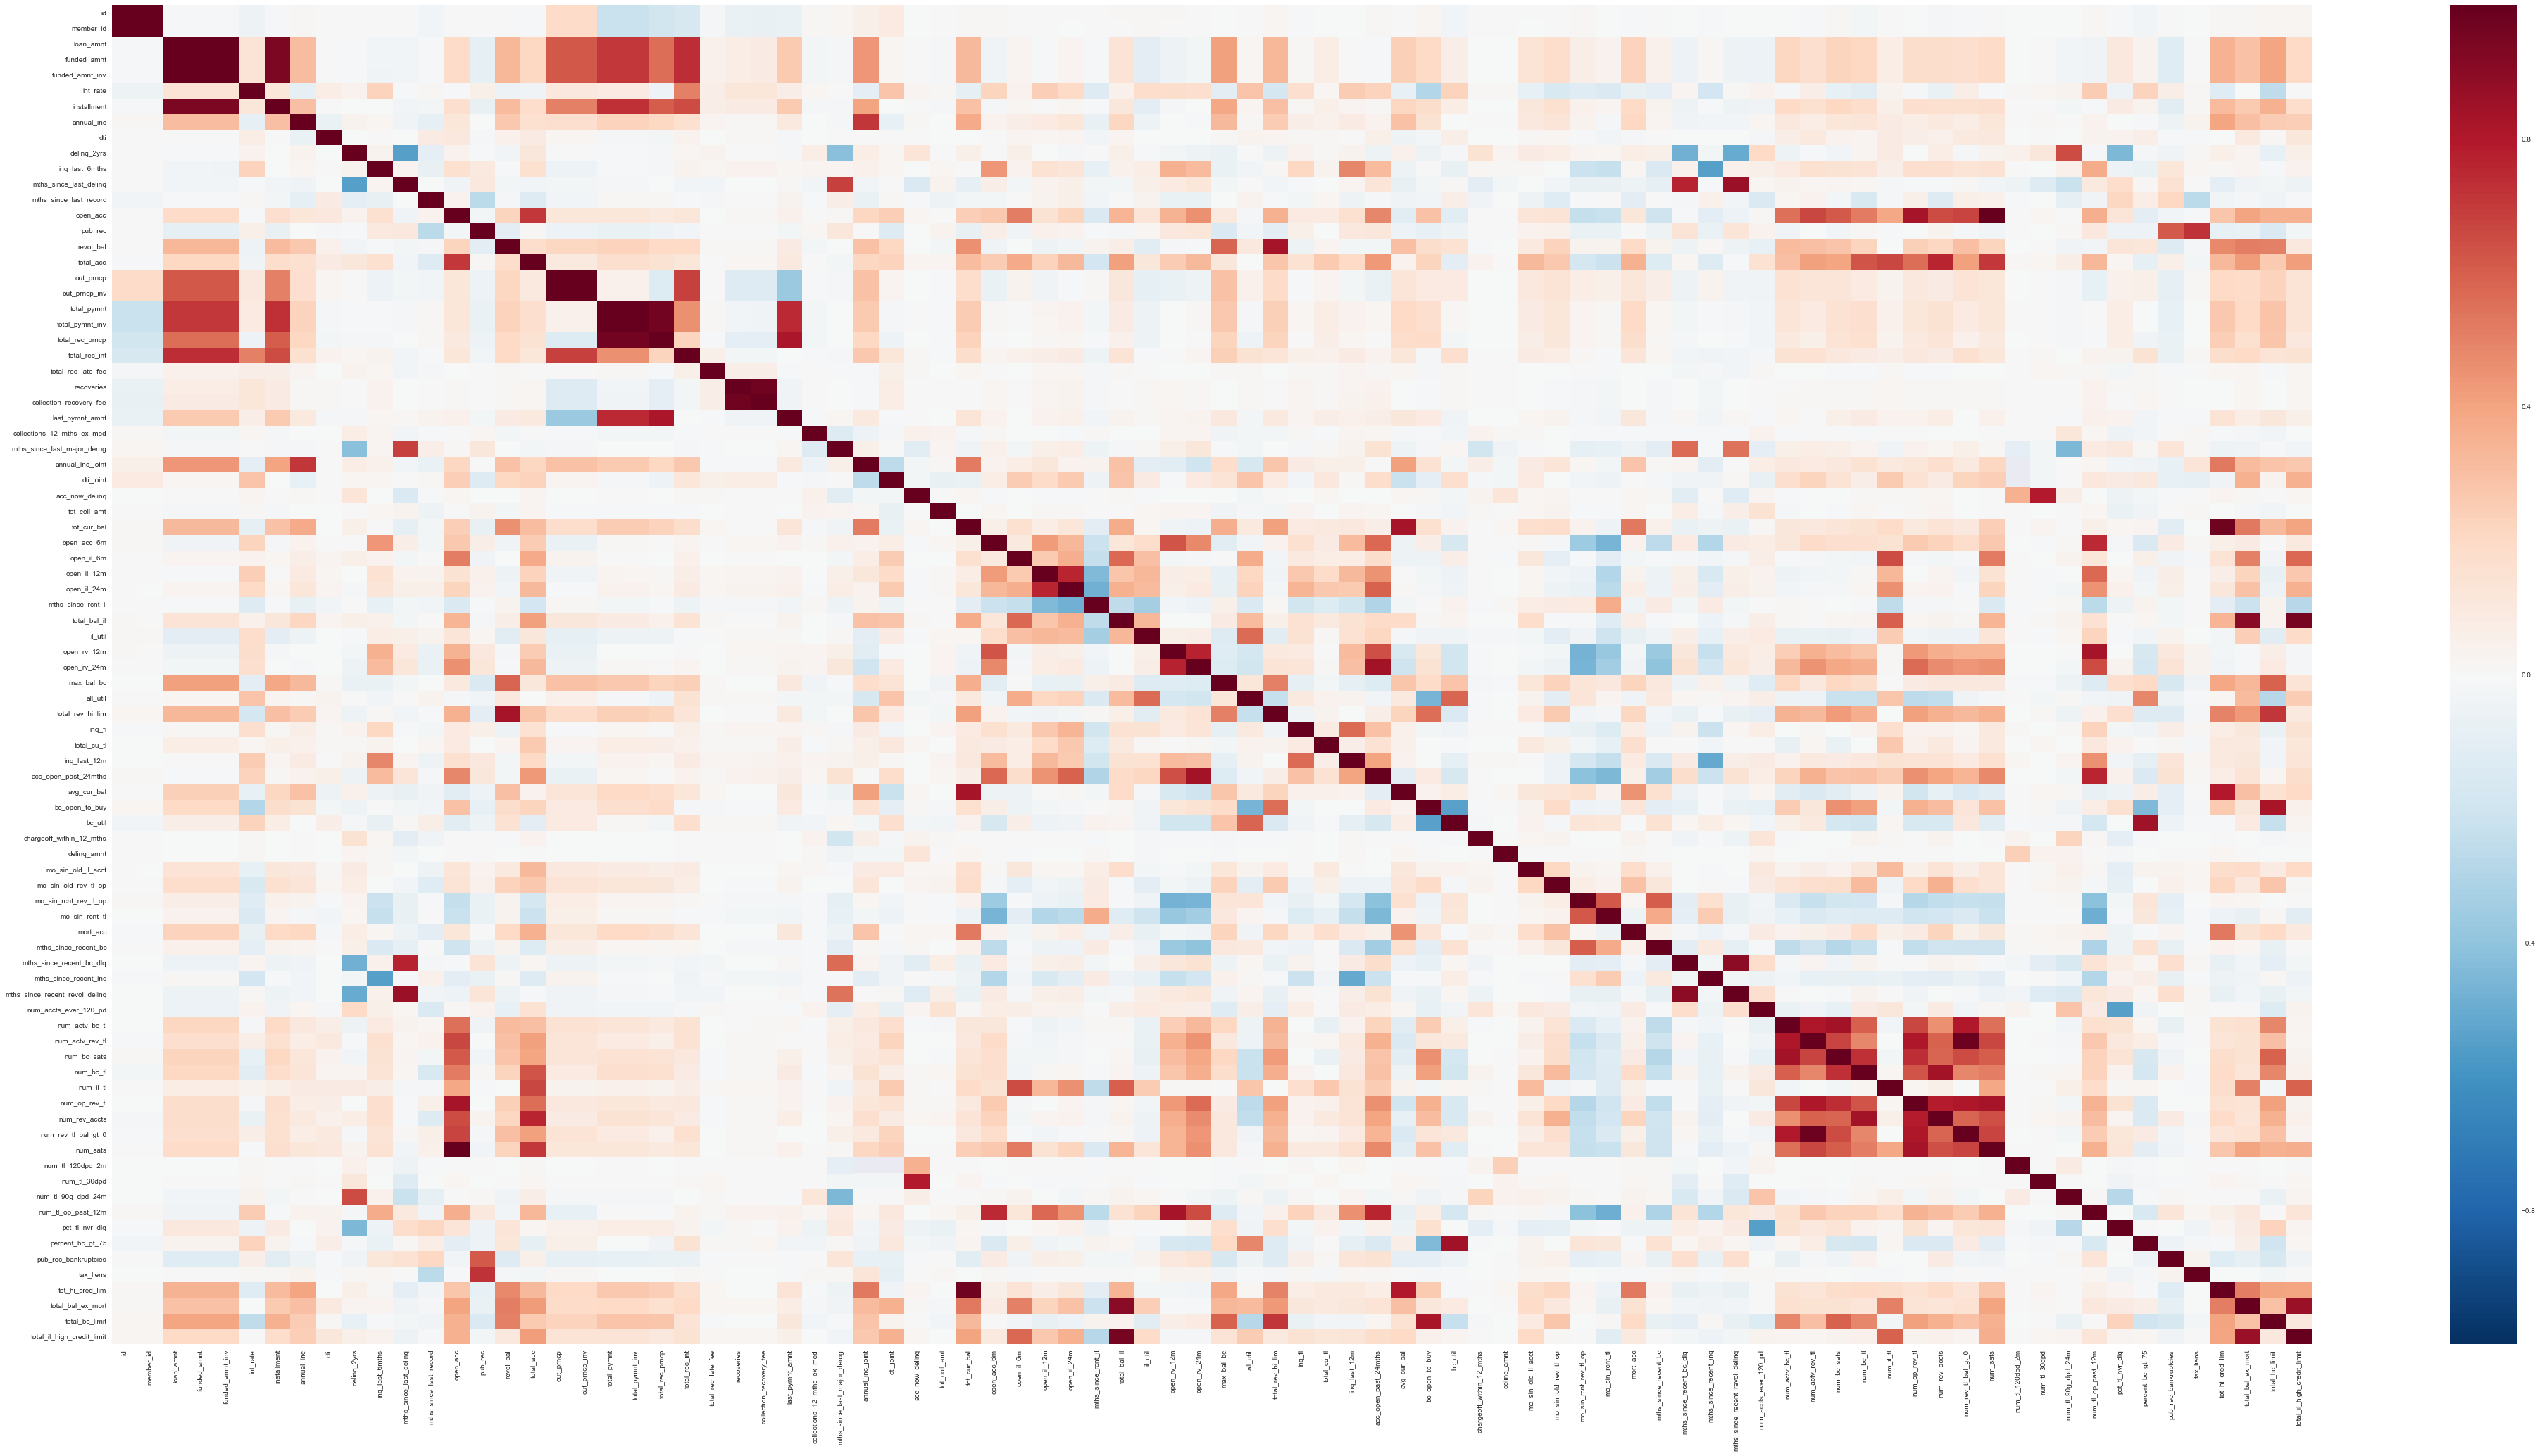

In [7]:
# Correlation of the Dataframe
Xcorr = X.corr()
Xcorr = Xcorr.dropna(axis = 1, how = 'all')
Xcorr = Xcorr.dropna(axis = 0, how = 'all')

plt.figure(figsize=(70,35))
sns.heatmap(Xcorr)

plt.show()

In [8]:
# Merge 'open_il_6m', 'open_il_12m', 'open_il_24m'
means = X[['open_il_6m', 'open_il_12m', 'open_il_24m']].mean(axis=0)
stds = X[['open_il_6m', 'open_il_12m', 'open_il_24m']].std(axis=0)
X['open_il'] = ((X[['open_il_6m', 'open_il_12m', 'open_il_24m']] - means) / stds).mean(axis = 1)

X = X.drop(['open_il_6m', 'open_il_12m', 'open_il_24m'], 1)

In [9]:
# Merge 'open_rv_12m', 'open_rv_24m'
means = X[['open_rv_12m', 'open_rv_24m']].mean(axis=0)
stds = X[['open_rv_12m', 'open_rv_24m']].std(axis=0)
X['open_rv'] = ((X[['open_rv_12m', 'open_rv_24m']] - means) / stds).mean(axis = 1)

X = X.drop(['open_rv_12m', 'open_rv_24m'], 1)

In [10]:
# Remove 'member_id'
X = X.drop('member_id', 1)

# Remove 'funded_amnt' and 'funded_amnt_inv'
## identical values as 'loan_amnt
X = X.drop(['funded_amnt', 'funded_amnt_inv'], 1)

# Remove 'out_prncp_inv'
X = X.drop('out_prncp_inv', 1)

# Remove 'total_pymnt_inv' and 'total_rec_prncp'
X = X.drop(['total_pymnt_inv', 'total_rec_prncp'], 1)

# Remove 'collection_recovery_fee'
X = X.drop('collection_recovery_fee', 1)

# Merge 'num_actv_bc_tl','num_bc_sats','num_bc_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats' 
## since they are redundant with each other
means = X[['num_actv_bc_tl','num_bc_sats','num_bc_tl', 'num_op_rev_tl',
           'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats']].mean(axis=0)

stds = X[['num_actv_bc_tl','num_bc_sats','num_bc_tl', 'num_op_rev_tl',
          'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats']].std(axis=0)

X['num'] = ((X[['num_actv_bc_tl','num_bc_sats','num_bc_tl', 'num_op_rev_tl',
                   'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats']] - means) / stds).mean(axis = 1)

X = X.drop(['num_actv_bc_tl','num_bc_sats','num_bc_tl'], 1)
X = X.drop(['num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats'], 1)

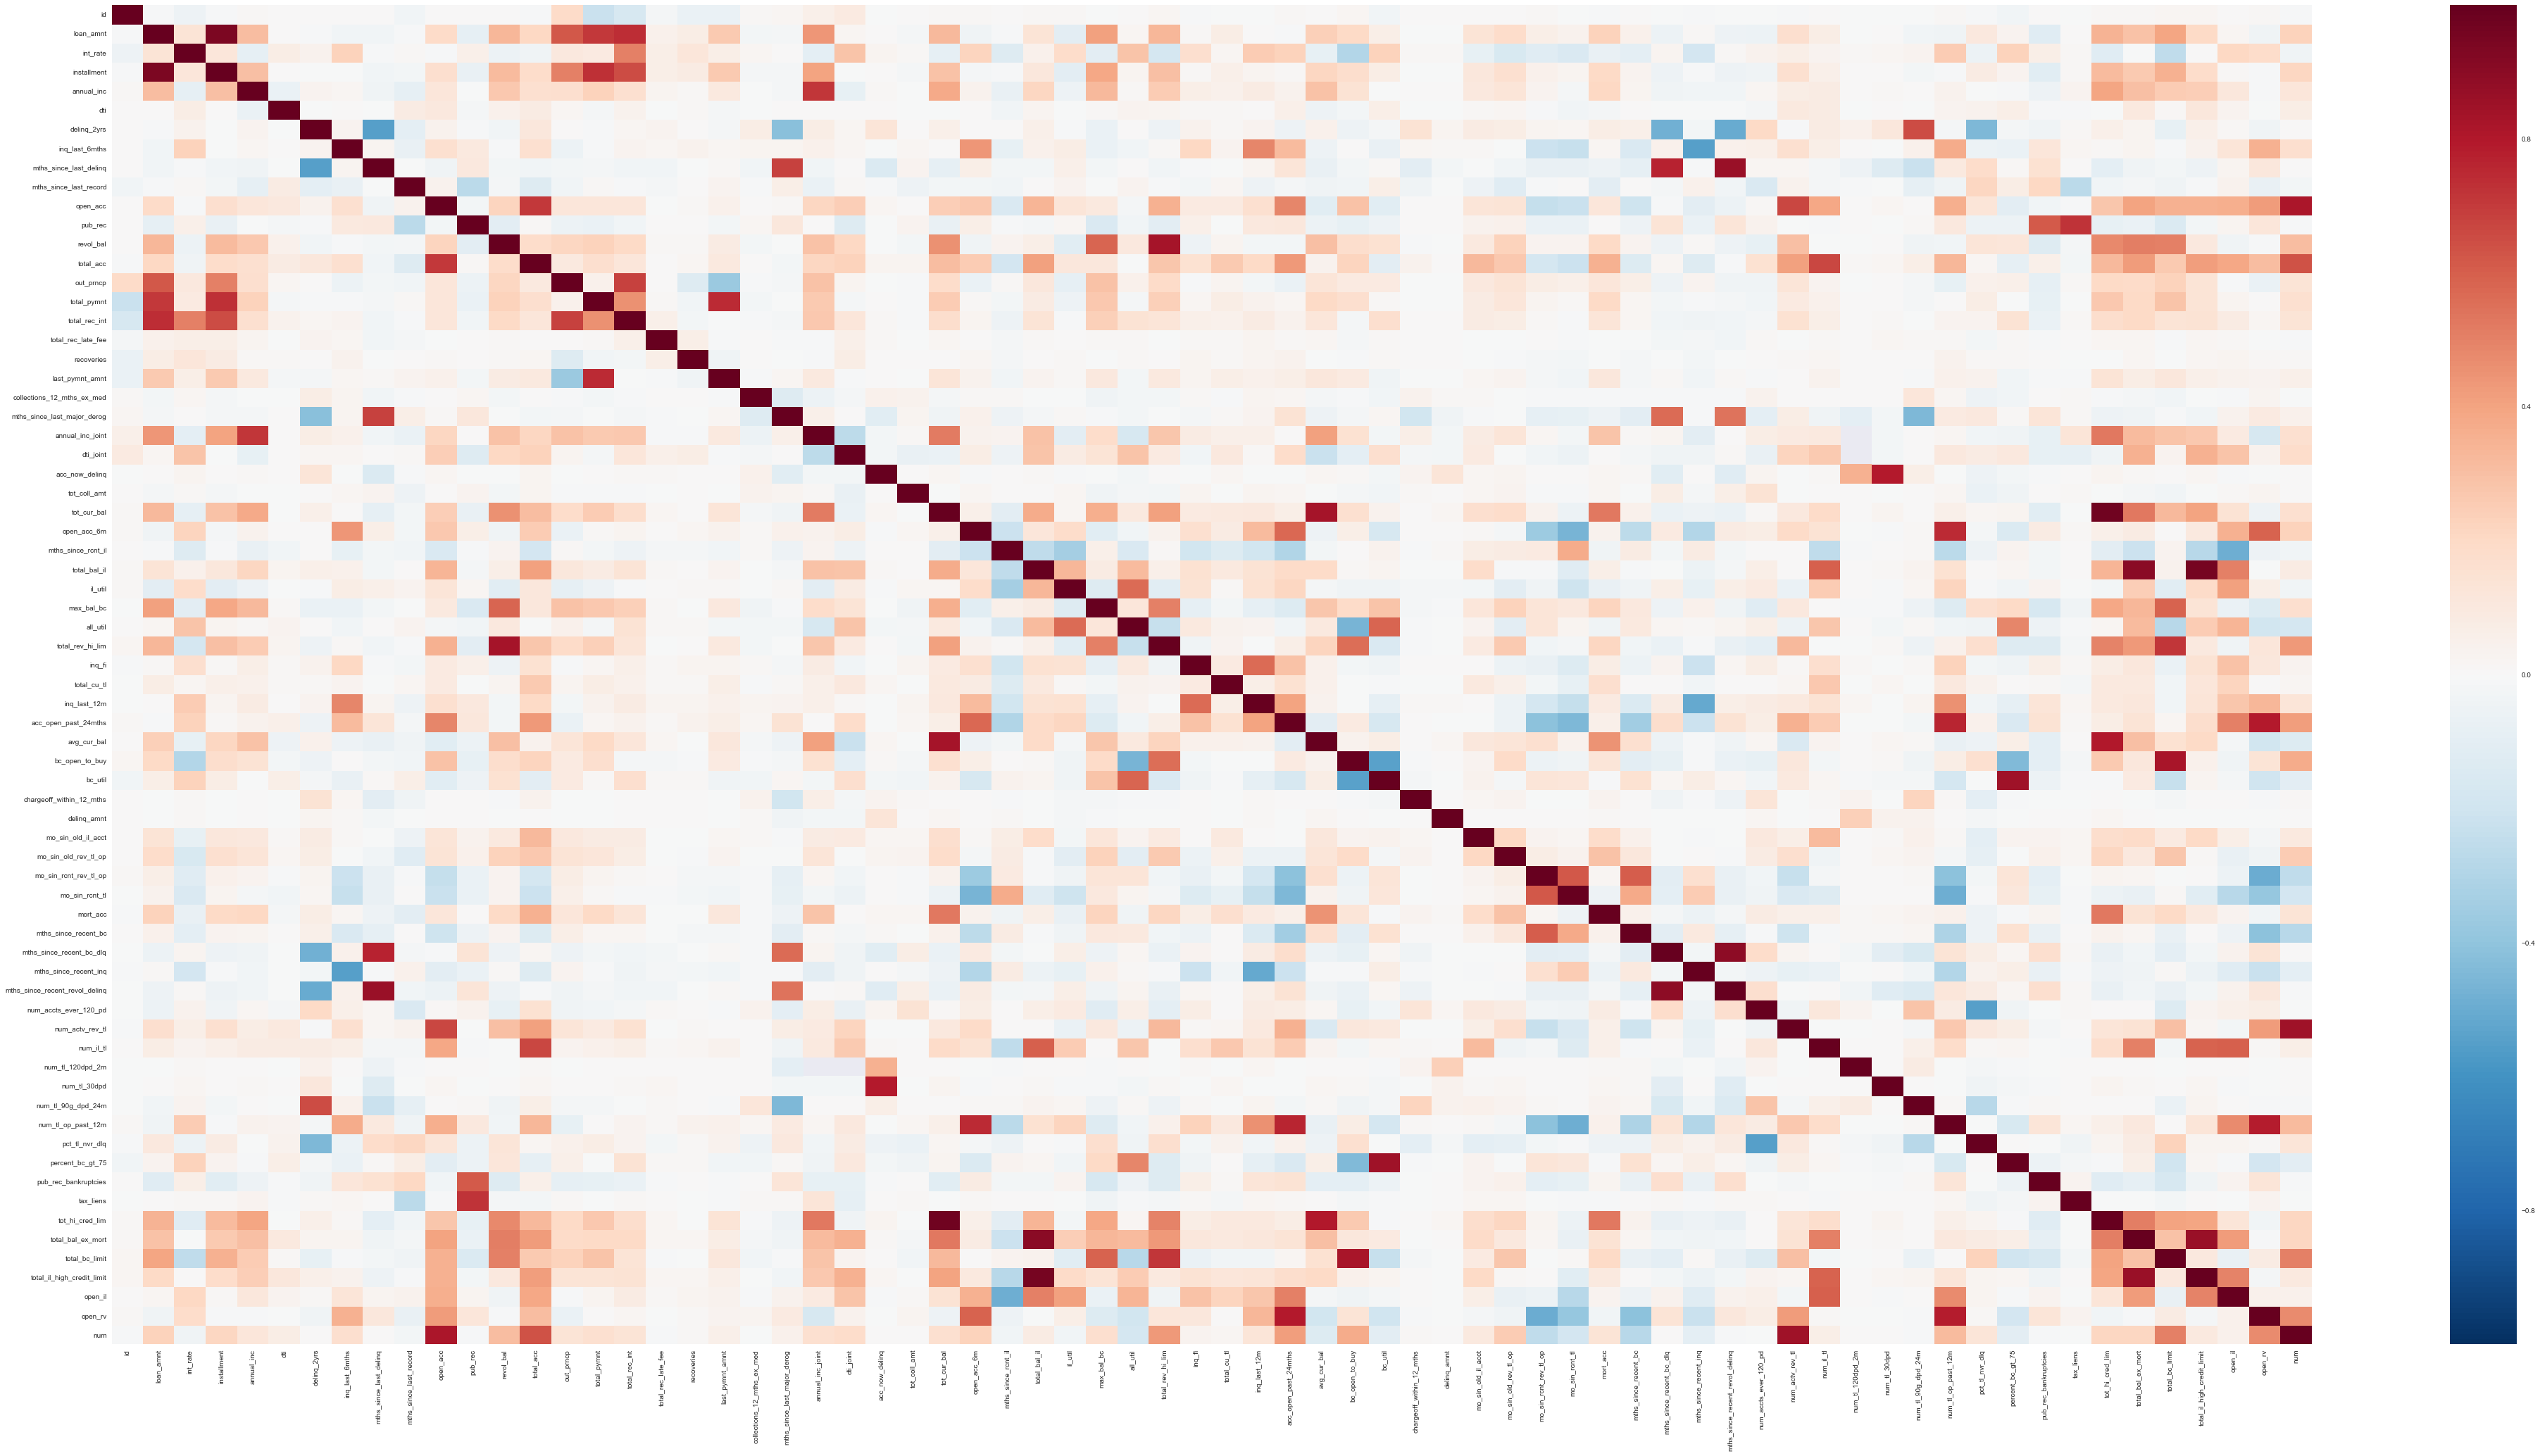

In [11]:
# New Correlation of the Dataframe 
Xcorr = X.corr()
Xcorr = Xcorr.dropna(axis = 1, how = 'all')
Xcorr = Xcorr.dropna(axis = 0, how = 'all')

plt.figure(figsize=(70,35))
sns.heatmap(Xcorr)

plt.show()

# PCA

In [12]:
# Create a new dataframes for PCA

# Float Variables
df = pd.DataFrame()

for var in Xcorr.columns:
    temp = X.loc[:, lambda x: X.columns == var]
    df[var] = temp
    
df = df.dropna(1, 'any')  
df = df.drop('id', 1)

    # Categorical Variables
    with only 'object' type
* cat_df = X
* cat_df = cat_df.sub(cat_df[list(df)])

    PCA only takes in float variables

In [24]:
len(list(df))

44

In [25]:
# Import PCA and StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

SS = StandardScaler().fit_transform(df)
sklearn_pca = PCA(n_components = len(list(df)))      # choosing the components
Y_sklearn = sklearn_pca.fit_transform(SS)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.15719242  0.09100481  0.06413952  0.05943718  0.04890905  0.04591992
  0.04207522  0.04017748  0.03790702  0.02860795  0.02524194  0.02488344
  0.02367866  0.02303979  0.02240823  0.02215957  0.02172517  0.02137054
  0.02098888  0.01941145  0.01810735  0.0175197   0.01542037  0.01496303
  0.01348995  0.01094763  0.01042229  0.00938239  0.00811158  0.0055548
  0.00501797  0.00453134  0.00448719  0.00437196  0.00390369  0.00347178
  0.00246213  0.00237172  0.00155738  0.00107881  0.0008464   0.00070041
  0.0006768   0.00032507]


    Future Note:
    For reverse process of pca, use Commulative sum function (np.cumsum(a))    

In [30]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
Y = y2015['loan_status']
X = pd.DataFrame(Y_sklearn)

cross_val_score(rfc, X, Y, cv=10)

array([ 0.93008953,  0.93258294,  0.93334283,  0.93324784,  0.93248635,
        0.93362622,  0.9318673 ,  0.92989622,  0.92982164,  0.92309885])

In [23]:
# only float variables 
rfc = ensemble.RandomForestClassifier()
Y = y2015['loan_status']
df = pd.get_dummies(df)  # for cat variables
df = df.dropna(axis=1)

cross_val_score(rfc, df, Y, cv=10)

array([ 0.96119779,  0.96193394,  0.9607466 ,  0.96001045,  0.95989076,
        0.95993826,  0.96010354,  0.96010354,  0.95986416,  0.95960196])

    Note to self: create different dataframes to avoid confusion